# Berlin Wall Deaths
## After the fall of the Wall, criminal investigations were launched

After World War II, Berlin had been divided into four sectors controlled by the Allies: the US, the Soviet Union, the United Kingdom and France. The sector borders inside the city could in general be used freely for passage out of the German Democratic Republic, even after the border between the Federal Republic of Germany and the GDR had been continually closed off, starting in 1952. The outer border of West Berlin, which was also the border between West-Berlin and the GDR, had also been closed down in 1952. During the night of 12 to 13 August 1961 the National People's Army, the German Border Police, the Volkspolizei and the Combat Groups of the Working Class locked down all passages between the Soviet sector and the three West sectors; construction of border protection facilities began.

During the first years border fortifications inside the city mostly consisted of brick walls with a top made of barbed wire. Clay bricks and concrete slabs were used for construction. Further obstacles of barbed wire and upstate walls delimitated the East and at some places, like Bernauer Straße, bricked-up buildings formed the boundary line. The buildings were situated on East-Berlin territory, whereas the pavement in front of the houses belonged to West-Berlin. In many places safety installations of West-Berlin's outer ring consisted of metal fences and barbed wire barriers. Technologically advanced upgrading took place later on and only in 1975 L-shaped concrete segments that were known from the fall of the Wall were added.
The Centre for Contemporary History and the Berlin Wall Memorial Site and Documentation Centre identified 136 people who died at the Berlin Wall. They detailed the event surrounding each death, stating where possible the role of the person. This is listed here as:

Escapee– a person who had clear signs of attempting to escape
No intention – a person who showed no obvious intent to cross the border
Guard – a border guard on duty
Suicide – a person who approached the guards with the intention of being killed

The dataset was prepared by Rushikesh Hiray.

Here is the link : https://www.kaggle.com/rushikeshhiray/berlin-wall-deaths


1 - Import libraries I used for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
%matplotlib inline

2 - Define dataframe after loading all values from cv file and assigning them to it

In [2]:
file_location_url = "files/belin_wall_death.csv";

berlin_wall_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in dataframe

In [3]:
row_count = berlin_wall_df.shape[0]
column_count = berlin_wall_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 140 , Column : 7


3 - Show first 5 values of dataframe

In [4]:
berlin_wall_df.head()

Unnamed: 0              dob                dod          Names Age     Role  \
0           1   23 August 1902     22 August 1961   Ida Siekmann  58  Escapee   
1           2  19 January 1937     24 August 1961  Günter Litfin  24  Escapee   
2           3    19 March 1934     29 August 1961    Roland Hoff  27  Escapee   
3           4      6 June 1914  17 September 1961   Rudolf Urban  47  Escapee   
4           5     31 July 1881  26 September 1961    Olga Segler  80  Escapee   

                                               Cause  
0  Died from internal injuries after she jumped o...  
1                           Shot in Humboldt Harbour  
2                           Shot in the Teltow Canal  
3  Fell while climbing out the window of his apar...  
4  Jumped from her home at Bernauer Straße 34 and...

4 - Show last 5 values of dataframe

In [5]:
berlin_wall_df.tail()

Unnamed: 0             dob               dod                 Names Age  \
135         136  31 August 1961  24 November 1986       Michael Bittner  25   
136         137     8 July 1962  12 February 1987          Lutz Schmidt  24   
137         138   13 April 1964   13 January 1989     Ingolf Diederichs  24   
138         139    21 June 1968   5 February 1989        Chris Gueffroy  20   
139         140  29 August 1956      8 March 1989  Winfried Freudenberg  32   

        Role                                              Cause  
135  Escapee                         Shot in Glienicke/Nordbahn  
136  Escapee                                    Shot in Treptow  
137  Escapee  Jumped from a train at Bösebrücke/Grenzübergan...  
138  Escapee                                      Shot in Britz  
139  Escapee                                      Balloon crash

5 - Show each column information of dataframe

In [6]:
berlin_wall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  140 non-null    int64 
 1   dob         140 non-null    object
 2   dod         139 non-null    object
 3   Names       136 non-null    object
 4   Age         140 non-null    object
 5   Role        140 non-null    object
 6   Cause       139 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.8+ KB


6 - Show how many variables there are in dataframe

In [7]:
berlin_wall_df.count()

Unnamed: 0    140
dob           140
dod           139
Names         136
Age           140
Role          140
Cause         139
dtype: int64

7 - Show descriptive statistics of dataframe

In [8]:
berlin_wall_df.describe()

Unnamed: 0
count    140.0000
mean      70.5000
std       40.5586
min        1.0000
25%       35.7500
50%       70.5000
75%      105.2500
max      140.0000

8 - Determine if null values of each column are in a dataframe

In [9]:
berlin_wall_df.isnull().sum()

Unnamed: 0    0
dob           0
dod           1
Names         4
Age           0
Role          0
Cause         1
dtype: int64

9 - Rename Columns Names to be better understood

In [10]:
berlin_wall_df.columns = ['Index', 'Date of Birth','Date of Death','Name','Dead Age','What was their aim','The reason of Death']

10 - Check unique values for each column

In [11]:
berlin_wall_df['Index'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140], dtype=int64)

In [12]:
berlin_wall_df['Date of Birth'].unique()

array(['23 August 1902', '19 January 1937', '19 March 1934',
       '6 June 1914', '31 July 1881', '11 March 1939', '8 March 1936',
       '18 June 1936', '28 January 1942', '27 May 1941',
       '31 January 1940', '12 August 1941', '25 April 1941',
       '1 July 1937', '2 May 1942', '14 September 1938', '17 August 1942',
       '28 June 1941', '7 May 1942', '28 December 1940', '29 April 1938',
       '27 April 1945', '21 July 1908', '1 February 1949', '8 March 1942',
       '9 December 1939', '14 January 1944', '10 January 1943',
       '2 December 1921', '28 April 1940', '27 April 1902',
       '12 July 1932', '14 December 1944', '14 February 1942',
       '11 December 1942', '5 July 1931', '15 January 1943',
       '1 February 1947', '10 July 1943', '12 February 1941',
       '21 February 1940', '21 October 1939', '27 October 1939',
       '2 October 1945', '31 January 1939', '13 August 1943',
       '20 September 1934', '27 October 1943', '10 November 1944',
       '12 June 1927',

In [13]:
berlin_wall_df['Date of Death'].unique()

array(['22 August 1961', '24 August 1961', '29 August 1961',
       '17 September 1961', '26 September 1961', '4 October 1961',
       '5 October 1961', '14 October 1961', '26 November 1961',
       '9 December 1961', '10 December 1961', '19 December 1961',
       '19 February 1962', '27 March 1962', '26 April 1962',
       '18 April 1962', '29 April 1962', '23 May 1962', '27 May 1962',
       '5 June 1962', '11 June 1962', '18 June 1962', '28 June 1962',
       '17 August 1962', '23 August 1962', '4 September 1962',
       '30 September 1962', '8 October 1962', '19 November 1962',
       '27 November 1962', '5 December 1962', '1 January 1963',
       '15 January 1963', '24 January 1963', '3 March 1963',
       '26 April 1963', '8 September 1963', '4 November 1963',
       '25 November 1963', '13 December 1963', '25 December 1963',
       '27 February 1964', '5 May 1964', '22 June 1964', '28 July 1964',
       '18 August 1964', '20 August 1964', '5 October 1964',
       '26 November 19

In [14]:
berlin_wall_df['Name'].unique()

array(['Ida Siekmann', 'Günter Litfin', 'Roland Hoff', 'Rudolf Urban',
       'Olga Segler', 'Bernd Lünser', 'Udo Düllick', 'Werner Probst',
       'Lothar Lehmann', 'Dieter Wohlfahrt', 'Ingo Krüger',
       'Georg Feldhahn', 'Dorit Schmiel', 'Heinz Jercha', 'Philipp Held',
       'Klaus Brueske', 'Peter Böhme', 'Jörgen Schmidtchen',
       'Horst Frank', 'Peter Göring', 'Lutz Haberlandt', 'Axel Hannemann',
       'Erna Kelm', 'Wolfgang Glöde', 'Reinhold Huhn', 'Siegfried Noffke',
       'Peter Fechter', 'Hans-Dieter Wesa', 'Ernst Mundt',
       'Günter Seling', 'Anton Walzer', 'Horst Plischke', 'Otfried Reck',
       'Günter Wiedenhöft', 'Hans Räwel', 'Horst Kutscher',
       'Peter Kreitlow', 'Wolf-Olaf Muszynski', 'Peter Mädler',
       'Siegfried Widera', 'Klaus Schröter', 'Dietmar Schulz',
       'Dieter Berger', 'Paul Schultz', 'Walter Hayn', 'Adolf Philipp',
       'Walter Heike', 'Norbert Wolscht', 'Rainer Gneiser',
       'Hildegard Trabant', 'Wernhard Mispelhorn', 'Egon Schul

In [15]:
berlin_wall_df['Dead Age'].unique()

array(['58', '24', '27', '47', '80', '22', '25', '19', '20', '21', '23',
       '17', '53', '13', '18', '40', '60', '30', '31', '16', '29', '37',
       'Unidentified man', '26', '42', '62', '10', '33', '46', '6', '28',
       '45', '41', '8', '1', '5', '39', '68', '34', '38', '32'],
      dtype=object)

In [16]:
berlin_wall_df['What was their aim'].unique()

array(['Escapee', 'No intention', 'Helper of escapees', 'Guard',
       'West-East-Crossing', 'Escapee (Polish citizen)', 'Unclear',
       'West-east-crossing', 'Suicide', 'Escapee (Soviet soldier)'],
      dtype=object)

In [17]:
berlin_wall_df['The reason of Death'].unique()

array(['Died from internal injuries after she jumped out the window of her apartment at Bernauer Straße 48.',
       'Shot in Humboldt Harbour', 'Shot in the Teltow Canal',
       'Fell while climbing out the window of his apartment at Bernauer Straße 1, and died of pneumonia in the Lazarus hospital',
       'Jumped from her home at Bernauer Straße 34 and died a day later from internal injuries',
       'Fell from the roof at Bernauer Straße 44 while fighting with GDR border patrol',
       'Drowned in the Spree', 'Shot in the Spree',
       'Drowned in the Havel', 'Shot while helping others escape',
       'Drowned in the Spree – defective diving equipment',
       'Drowned in the Spree after desertion; body found on 11 March 1962',
       'Shot at Wilhelmsruher Damm at the sector border between Berlin-Pankow and Berlin-Reinickendorf',
       'Shot at Heidelberger Strasse 75 at the sector border between Berlin-Treptow and Berlin-Neukölln',
       'Drowned in the Spree on or after 8 Ap

11 - Remove nan values from dataframe and unessential values

In [18]:
berlin_wall_df['Name'] = berlin_wall_df['Name'].astype(str)
berlin_wall_df.drop(berlin_wall_df.index[berlin_wall_df['Name'] == "nan"], inplace = True)

berlin_wall_df['Date of Death'] = berlin_wall_df['Date of Death'].astype(str)
berlin_wall_df.drop(berlin_wall_df.index[berlin_wall_df['Date of Death'] == "nan"], inplace = True)

berlin_wall_df['Dead Age'] = berlin_wall_df['Dead Age'].astype(str)
berlin_wall_df.drop(berlin_wall_df.index[berlin_wall_df['Dead Age'] == "Unidentified man"], inplace = True)

12 - Redefine values in Date of Birth and Date of Death

In [19]:
date_of_birth_list = berlin_wall_df["Date of Birth"].to_list()
date_of_death_list = berlin_wall_df["Date of Death"].to_list()
date_of_death_list

['22 August 1961',
 '24 August 1961',
 '29 August 1961',
 '17 September 1961',
 '26 September 1961',
 '4 October 1961',
 '5 October 1961',
 '14 October 1961',
 '26 November 1961',
 '9 December 1961',
 '10 December 1961',
 '19 December 1961',
 '19 February 1962',
 '27 March 1962',
 '26 April 1962',
 '18 April 1962',
 '18 April 1962',
 '18 April 1962',
 '29 April 1962',
 '23 May 1962',
 '27 May 1962',
 '5 June 1962',
 '11 June 1962',
 '11 June 1962',
 '18 June 1962',
 '28 June 1962',
 '17 August 1962',
 '23 August 1962',
 '4 September 1962',
 '30 September 1962',
 '8 October 1962',
 '19 November 1962',
 '27 November 1962',
 '5 December 1962',
 '1 January 1963',
 '15 January 1963',
 '24 January 1963',
 '3 March 1963',
 '26 April 1963',
 '8 September 1963',
 '4 November 1963',
 '25 November 1963',
 '13 December 1963',
 '25 December 1963',
 '27 February 1964',
 '5 May 1964',
 '22 June 1964',
 '28 July 1964',
 '28 July 1964',
 '18 August 1964',
 '20 August 1964',
 '5 October 1964',
 '26 Nove

13 - Write a function to convert date to be more sensible

In [20]:
def convertdatetime(defined_list):    
    sample_list = []
    for date in defined_list:
        day = date.split(" ")[0]
        month_name = date.split(" ")[1]
        year = date.split(" ")[2]
        month = ""
        if(month_name in "January"):
            month = 1
        if(month_name in "February"):
            month = 2
        if(month_name in "March"):
            month = 3
        if(month_name in "April"):
            month = 4
        if(month_name in "May"):
            month = 5
        if(month_name in "June"):
            month = 6
        if(month_name in "July"):
            month = 7
        if(month_name in "August"):
            month = 8
        if(month_name in "September"):
            month = 9
        if(month_name in "October"):
            month = 10
        if(month_name in "November"):
            month = 11
        if(month_name in "December"):
            month = 12
        sample_list.append(day +"-"+ str(month) + "-" + year)    
    return sample_list

14 - Assign converted datetime to relevant list

In [21]:
birthday_list = convertdatetime(date_of_birth_list)
death_list = convertdatetime(date_of_death_list)

15 - Create a new columns for year and month name for birthday and deathday

In [22]:
berlin_wall_df['birthday_month'] = berlin_wall_df['Date of Birth'].apply(lambda x : x.split(' ')[1])
berlin_wall_df['birthday_year'] = berlin_wall_df['Date of Birth'].apply(lambda x : x.lstrip().split(' ')[-1])

berlin_wall_df['death_month'] = berlin_wall_df['Date of Death'].apply(lambda x : x.split(' ')[1])
berlin_wall_df['death_year'] = berlin_wall_df['Date of Death'].apply(lambda x : x.lstrip().split(' ')[-1])

16 - Check first 5 values

In [23]:
berlin_wall_df.head()

Index    Date of Birth      Date of Death           Name Dead Age  \
0      1   23 August 1902     22 August 1961   Ida Siekmann       58   
1      2  19 January 1937     24 August 1961  Günter Litfin       24   
2      3    19 March 1934     29 August 1961    Roland Hoff       27   
3      4      6 June 1914  17 September 1961   Rudolf Urban       47   
4      5     31 July 1881  26 September 1961    Olga Segler       80   

  What was their aim                                The reason of Death  \
0            Escapee  Died from internal injuries after she jumped o...   
1            Escapee                           Shot in Humboldt Harbour   
2            Escapee                           Shot in the Teltow Canal   
3            Escapee  Fell while climbing out the window of his apar...   
4            Escapee  Jumped from her home at Bernauer Straße 34 and...   

  birthday_month birthday_year death_month death_year  
0         August          1902      August       1961  
1        January          1937      August       1961  
2          March          1934      August       1961  
3           June          1914   September       1961  
4           July          1881   September       1961

17 - Seperate names and surnames form Name Column

In [24]:
berlin_wall_df['FirstName'] = berlin_wall_df['Name'].apply(lambda x : x.split(' ')[0])
berlin_wall_df['Surname'] = berlin_wall_df['Name'].apply(lambda x : x.lstrip().split(' ')[-1])
berlin_wall_df.rename(columns={'FirstName':'Name'})
berlin_wall_df.drop(['Name'], axis = 1, inplace = True) 
berlin_wall_df.head()

Index    Date of Birth      Date of Death Dead Age What was their aim  \
0      1   23 August 1902     22 August 1961       58            Escapee   
1      2  19 January 1937     24 August 1961       24            Escapee   
2      3    19 March 1934     29 August 1961       27            Escapee   
3      4      6 June 1914  17 September 1961       47            Escapee   
4      5     31 July 1881  26 September 1961       80            Escapee   

                                 The reason of Death birthday_month  \
0  Died from internal injuries after she jumped o...         August   
1                           Shot in Humboldt Harbour        January   
2                           Shot in the Teltow Canal          March   
3  Fell while climbing out the window of his apar...           June   
4  Jumped from her home at Bernauer Straße 34 and...           July   

  birthday_year death_month death_year FirstName   Surname  
0          1902      August       1961       Ida  Siekmann  
1          1937      August       1961    Günter    Litfin  
2          1934      August       1961    Roland      Hoff  
3          1914   September       1961    Rudolf     Urban  
4          1881   September       1961      Olga    Segler

18 - Assign convert datetimes of birthday and deathday to relevant columns named for Date of Birth and Date of Death

In [25]:
berlin_wall_df['Date of Birth'] = birthday_list
berlin_wall_df['Date of Death'] = death_list
berlin_wall_df.head()

Index Date of Birth Date of Death Dead Age What was their aim  \
0      1     23-8-1902     22-8-1961       58            Escapee   
1      2     19-1-1937     24-8-1961       24            Escapee   
2      3     19-3-1934     29-8-1961       27            Escapee   
3      4      6-6-1914     17-9-1961       47            Escapee   
4      5     31-7-1881     26-9-1961       80            Escapee   

                                 The reason of Death birthday_month  \
0  Died from internal injuries after she jumped o...         August   
1                           Shot in Humboldt Harbour        January   
2                           Shot in the Teltow Canal          March   
3  Fell while climbing out the window of his apar...           June   
4  Jumped from her home at Bernauer Straße 34 and...           July   

  birthday_year death_month death_year FirstName   Surname  
0          1902      August       1961       Ida  Siekmann  
1          1937      August       1961    Günter    Litfin  
2          1934      August       1961    Roland      Hoff  
3          1914   September       1961    Rudolf     Urban  
4          1881   September       1961      Olga    Segler

19 - Convert both Date of Birth and Date of Death to defined format as day-month-year

In [26]:
berlin_wall_df['Date of Birth'] = pd.to_datetime(berlin_wall_df['Date of Birth'])
berlin_wall_df['Date of Death'] = pd.to_datetime(berlin_wall_df['Date of Death'])

berlin_wall_df['Date of Birth'] = berlin_wall_df['Date of Birth'].dt.strftime('%d-%m-%Y')
berlin_wall_df['Date of Death'] = berlin_wall_df['Date of Death'].dt.strftime('%d-%m-%Y')
berlin_wall_df.head()

Index Date of Birth Date of Death Dead Age What was their aim  \
0      1    23-08-1902    22-08-1961       58            Escapee   
1      2    19-01-1937    24-08-1961       24            Escapee   
2      3    19-03-1934    29-08-1961       27            Escapee   
3      4    06-06-1914    17-09-1961       47            Escapee   
4      5    31-07-1881    26-09-1961       80            Escapee   

                                 The reason of Death birthday_month  \
0  Died from internal injuries after she jumped o...         August   
1                           Shot in Humboldt Harbour        January   
2                           Shot in the Teltow Canal          March   
3  Fell while climbing out the window of his apar...           June   
4  Jumped from her home at Bernauer Straße 34 and...           July   

  birthday_year death_month death_year FirstName   Surname  
0          1902      August       1961       Ida  Siekmann  
1          1937      August       1961    Günter    Litfin  
2          1934      August       1961    Roland      Hoff  
3          1914   September       1961    Rudolf     Urban  
4          1881   September       1961      Olga    Segler

20 - Define a function to calcualte horoscope_dates

In [27]:
def calculate_horoscope_dates(start, end):
    horoscope_start = datetime.datetime.strptime(start, "%m-%d")
    horoscope_end = datetime.datetime.strptime(end, "%m-%d")
    horoscope_interval = [horoscope_start + datetime.timedelta(days=x) for x in range(0, (horoscope_end-horoscope_start).days)]
    
    string_interval = []
    for date in horoscope_interval:
        #convert datetime to str
        string_interval.append(date.strftime("%d-%m"))
        # remove minutes and seconds from date
        string_interval = [i.lstrip("0") for i in string_interval]

    return string_interval

21 - Define all horoscope calendar

In [28]:
aries = calculate_horoscope_dates("3-21", "4-20")
taurus = calculate_horoscope_dates("4-20", "5-21")
gemini = calculate_horoscope_dates("5-21", "6-22")
cancer = calculate_horoscope_dates("6-22", "7-23")
leo = calculate_horoscope_dates("7-23", "8-23")
virgo = calculate_horoscope_dates("8-23", "9-23")
libra = calculate_horoscope_dates("9-23", "10-23")
scorpio = calculate_horoscope_dates("10-23", "11-23")
sagittarius = calculate_horoscope_dates("11-23", "12-22")
capricorn = calculate_horoscope_dates("12-22", "1-20")
aquarius = calculate_horoscope_dates("1-20", "2-19")
pisces = calculate_horoscope_dates("2-19", "3-21")

22 - Define a function to find each individual's horoscope in terms of their birthday and death day

In [29]:
def define_horoscope(horoscope_list):
    new_horoscope_list = []
    
    for dates in horoscope_list:
        if(dates in aries):
            new_horoscope_list.append("Aries")
        elif(dates in taurus):
            new_horoscope_list.append("Taurus")
        elif(dates in gemini):
            new_horoscope_list.append("Gemini")    
        elif(dates in cancer):
            new_horoscope_list.append("Cancer")
        elif(dates in leo):
            new_horoscope_list.append("Leo")
        elif(dates in virgo):
            new_horoscope_list.append("Virgo")
        elif(dates in libra):
            new_horoscope_list.append("Libra")
        elif(dates in scorpio):
            new_horoscope_list.append("Scorpio")
        elif(dates in sagittarius):
            new_horoscope_list.append("Sagittarius")
        elif(dates in capricorn):
            new_horoscope_list.append("Capricorn")
        elif(dates in aquarius):
            new_horoscope_list.append("Aquarius")
        else:
            new_horoscope_list.append("Pisces")  
    return new_horoscope_list


23 - Convert Date of Birth and Date of Death to List Object

In [30]:
birthday_list = berlin_wall_df["Date of Birth"].to_list()
deathday_list = berlin_wall_df["Date of Death"].to_list()

24 - Define a function to get only day and month values form each list

In [31]:
def getDayandMonthFromList(datetime_list):
    horoscope_list = []
    for date in datetime_list:
        day = date.split("-")[0]
        month = date.split("-")[1]
        year = date.split("-")[2]
        horoscope_list.append(day +"-"+ month)
    return horoscope_list

25 - Rearrange birthday_list and deathday_list

In [32]:
birthday_list = getDayandMonthFromList(birthday_list)
deathday_list = getDayandMonthFromList(deathday_list)

26 - Add new 2 values to dataframe

In [33]:
berlin_wall_df['Birth Horoscope'] = define_horoscope(birthday_list) 
berlin_wall_df['Dead Horoscope'] = define_horoscope(deathday_list) 
berlin_wall_df.head()

Index Date of Birth Date of Death Dead Age What was their aim  \
0      1    23-08-1902    22-08-1961       58            Escapee   
1      2    19-01-1937    24-08-1961       24            Escapee   
2      3    19-03-1934    29-08-1961       27            Escapee   
3      4    06-06-1914    17-09-1961       47            Escapee   
4      5    31-07-1881    26-09-1961       80            Escapee   

                                 The reason of Death birthday_month  \
0  Died from internal injuries after she jumped o...         August   
1                           Shot in Humboldt Harbour        January   
2                           Shot in the Teltow Canal          March   
3  Fell while climbing out the window of his apar...           June   
4  Jumped from her home at Bernauer Straße 34 and...           July   

  birthday_year death_month death_year FirstName   Surname Birth Horoscope  \
0          1902      August       1961       Ida  Siekmann           Virgo   
1          1937      August       1961    Günter    Litfin          Pisces   
2          1934      August       1961    Roland      Hoff          Pisces   
3          1914   September       1961    Rudolf     Urban          Pisces   
4          1881   September       1961      Olga    Segler             Leo   

  Dead Horoscope  
0            Leo  
1          Virgo  
2          Virgo  
3          Virgo  
4          Libra

27 - Draw a Figure about When all defined people born in which day of which year

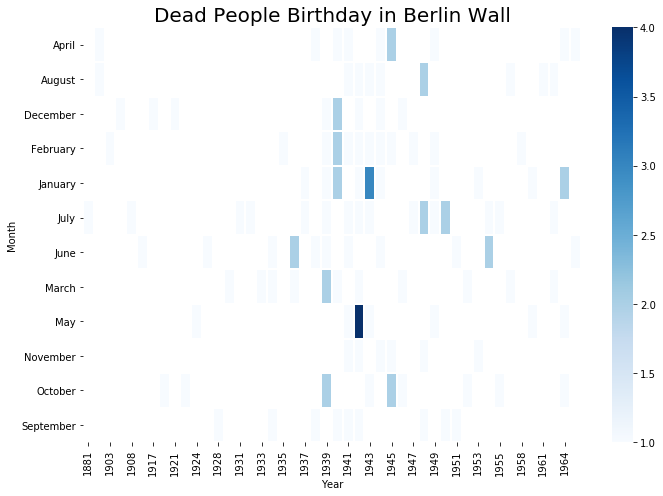

In [34]:
plt.figure(figsize=(10, 7))

berlin_wall_df['month'] = pd.Categorical(berlin_wall_df['birthday_month'], 
                                                categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

berlin_wall_df_year_month = berlin_wall_df.groupby(["birthday_year", "birthday_month"])["Index"].size().reset_index()
berlin_wall_df_year_month = berlin_wall_df_year_month.pivot("birthday_month", "birthday_year", "Index")
sns.heatmap(berlin_wall_df_year_month, cmap="Blues", linewidths=1 )

plt.title("Dead People Birthday in Berlin Wall", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image1.png')
plt.tight_layout()
plt.show()

28 -Draw a Figure about When all defined people dead in which day of which year 

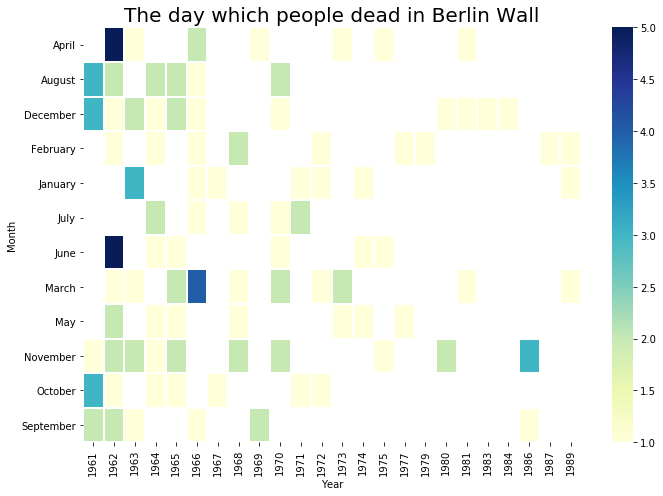

In [35]:
plt.figure(figsize=(10, 7))

berlin_wall_df['month'] = pd.Categorical(berlin_wall_df['death_month'], 
                                                categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

berlin_wall_df_year_month = berlin_wall_df.groupby(["death_year", "death_month"])["Index"].size().reset_index()
berlin_wall_df_year_month = berlin_wall_df_year_month.pivot("death_month", "death_year", "Index")
sns.heatmap(berlin_wall_df_year_month, cmap="YlGnBu", linewidths=1 )

plt.title("The day which people dead in Berlin Wall", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image2.png')
plt.tight_layout()
plt.show()

29 - Show the count of dead people age in Berlin Wall

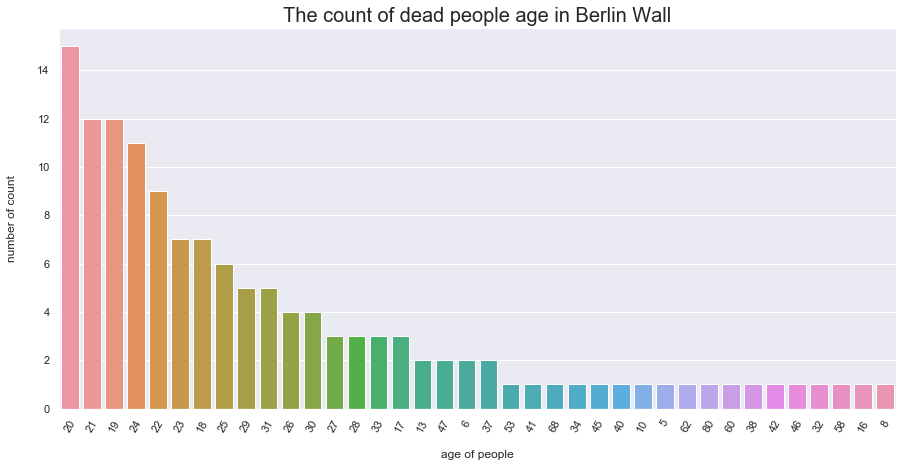

In [36]:
plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")
ax = sns.countplot(x="Dead Age", 
                   data=berlin_wall_df,
                   order = berlin_wall_df['Dead Age'].value_counts().index
                  )
plt.title('The count of dead people age in Berlin Wall', fontsize=20, y=1)
plt.xlabel('age of people', labelpad=16)
plt.ylabel('number of count', labelpad=20)
plt.xticks(rotation=60)
plt.savefig('images/image3.png')
plt.show()

30 - Draw a Figure about What was their aim to go away

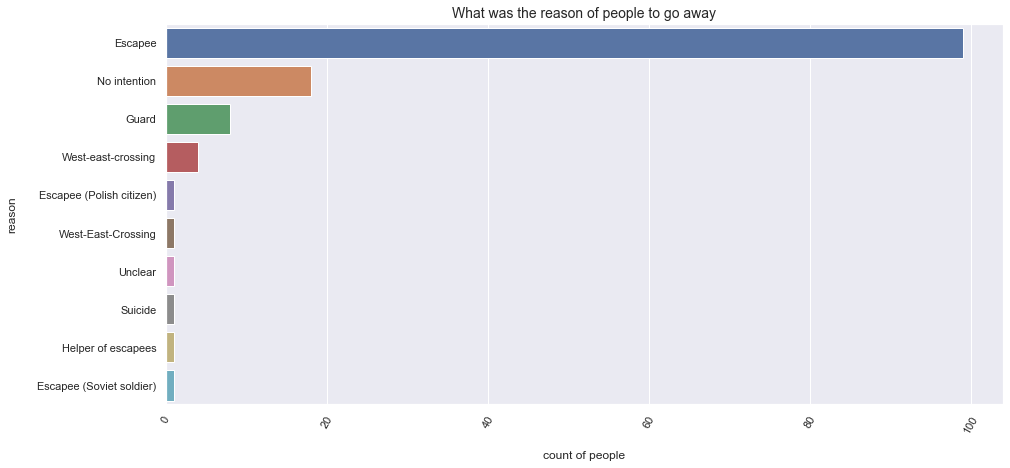

In [37]:
plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")
ax = sns.countplot(y="What was their aim", 
                   data=berlin_wall_df,
                   order = berlin_wall_df['What was their aim'].value_counts().index
                  )
plt.title("What was the reason of people to go away", fontsize = 14)
plt.xlabel('count of people', labelpad=16)
plt.ylabel('reason', labelpad=20)
plt.xticks(rotation=60)
plt.savefig('images/image4.png')
plt.show()

31 - Draw a Donot Graph to calculate holoscope numbers of defined people in terms of their Birthday

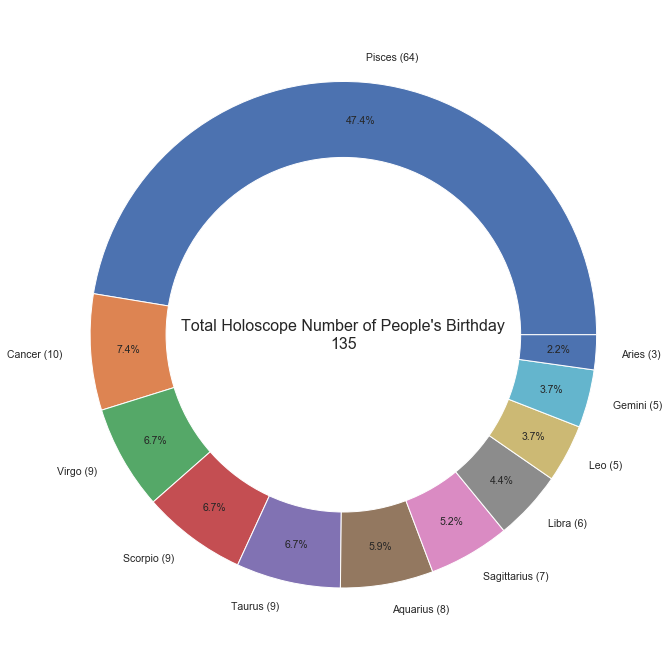

In [38]:
berlin_wall_df_holoscope_birthday = berlin_wall_df["Birth Horoscope"].value_counts()
df = pd.DataFrame(berlin_wall_df_holoscope_birthday).reset_index()
df.columns = ['Holoscope', 'Count']


plt.figure(figsize=(10,12))
ax = subplot_kw=dict(aspect="equal")
my_circle = plt.Circle((0, 0), 0.7, color='white')

labels = [df['Holoscope'][i] +" (" + str(df['Count'][i]) +") "  for i in range(df.shape[0])]

d = plt.pie(df['Count'], labels= labels,
            autopct='%1.1f%%',
            pctdistance=0.85, 
            labeldistance=1.1,
            textprops = {'fontsize':10.5})

plt.axis('equal')
plt.gca().add_artist(my_circle)

plt.text(0, 
         0, 
         "Total Holoscope Number "+ "of People's Birthday" + "\n"+str(df['Count'].sum()),
         horizontalalignment='center',
         verticalalignment='center',
         size=16,
        )
plt.savefig('images/image5.png')  
plt.show()

32 - Draw a Pie Graph to calculate holoscope numbers of defined people in terms of their deathday

In [39]:
berlin_wall_df_dead_horoscope = berlin_wall_df["Dead Horoscope"].value_counts()

trace=go.Pie(labels=berlin_wall_df_dead_horoscope.index, 
             values=berlin_wall_df_dead_horoscope.values,
             pull=[0.05]
            )

layout = go.Layout(title="Total Holoscope Number of Peoples' Dead Day", 
                   height=400, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=500, width=700)
pio.write_image(fig, "images/image6.png")
fig.show()

33 - Calculate the most 10 popular firstnames of People

In [40]:
categories = ", ".join(berlin_wall_df['FirstName']).split(", ")
counter_list = Counter(categories).most_common(10)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#78b7de'))

data1 = [trace1]
layout = go.Layout(title="Top 10 FirstName of People", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image7.png")
fig.show()

34 - Calculate the most 10 popular lastName of People

In [41]:
categories = ", ".join(berlin_wall_df['Surname']).split(", ")
counter_list = Counter(categories).most_common(10)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color='#b85832'))

data1 = [trace1]
layout = go.Layout(title="Top 10 Surname of People", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
pio.write_image(fig, "images/image8.png")
fig.show()

35 - Define WordCloud graph to show all titles in Berlin Wall Image

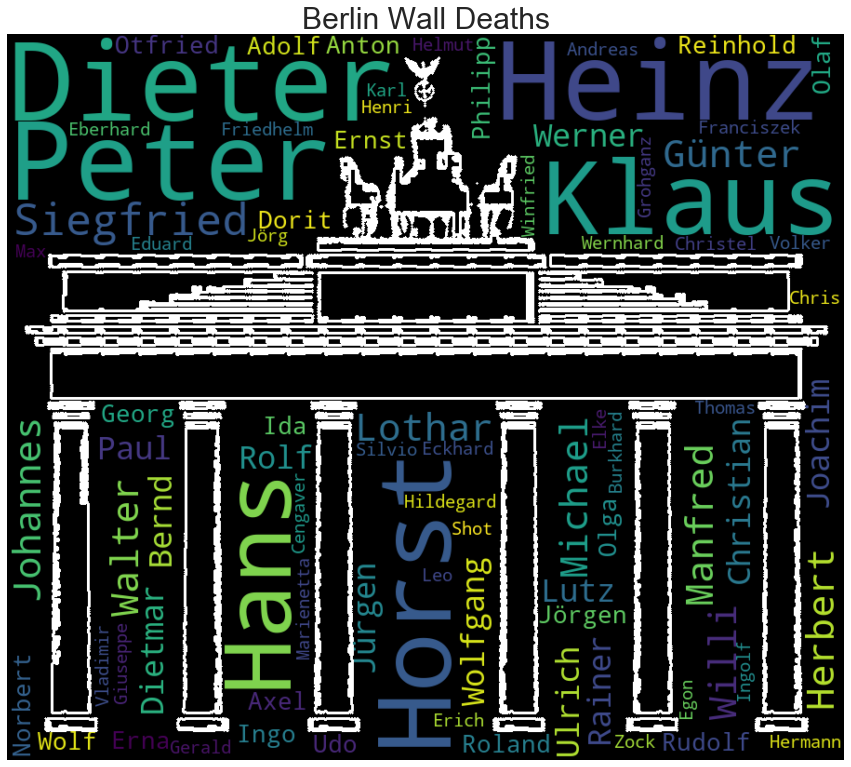

In [42]:
plt.figure(figsize=[15,15])

image = Image.open("images/berlin_wall.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(berlin_wall_df['FirstName']))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Berlin Wall Deaths',fontsize = 30)
plt.savefig('images/image9.png')
plt.show()

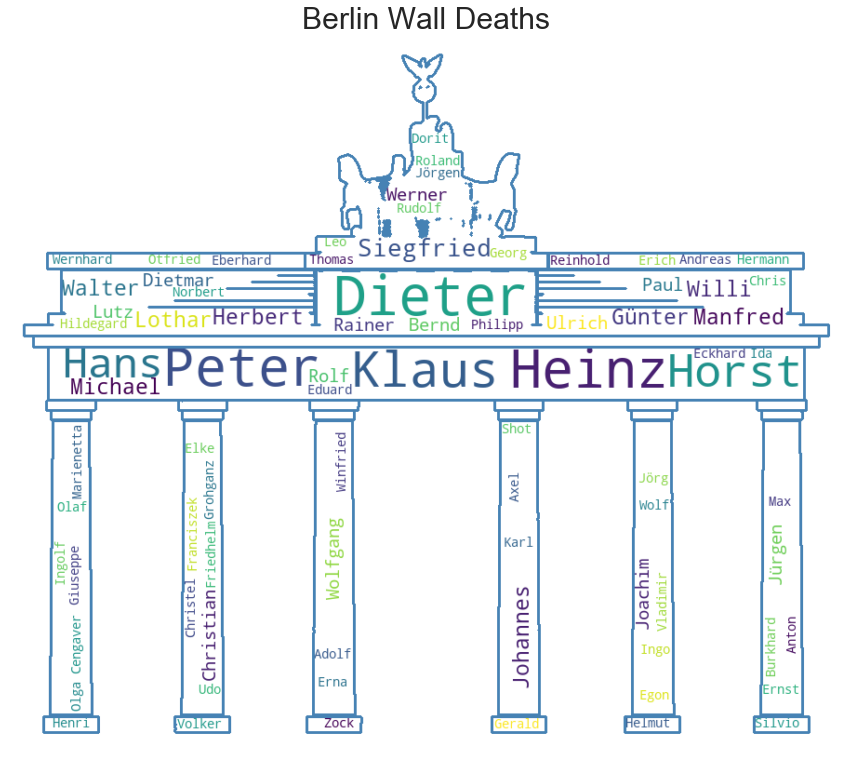

In [43]:
plt.figure(figsize=[15, 15])

image = Image.open("images/berlin_wall_black_background.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='steelblue',
                    ).generate(' '.join(berlin_wall_df['FirstName']))

#image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Berlin Wall Deaths', fontsize=30)
plt.savefig('images/image10.png')
plt.show()